In [1]:
import numpy as np

In [5]:
class Economy:
    def __init__(self, population_size=int(1e4), initial_money=100, log_epoch=1000):
        self.ppl = population_size
        self.money = np.ones([population_size]) * initial_money
        
        self.log_epoch = log_epoch
        self.money_log = []
        
    def __day(self):
        winners = np.random.randint(0, self.ppl, size=self.ppl)
        loosers = np.random.randint(0, self.ppl, size=self.ppl)
        
        broke_mask = (self.money[loosers] != 0)
        
        self.money[winners] = self.money[winners] + np.ones(self.ppl) * broke_mask
        self.money[loosers] = self.money[loosers] - np.ones(self.ppl) * broke_mask
    
    def __call__(self, n_epoch=100):
        for epoch in range(n_epoch):
            self.__day()
        
        return self.money

In [11]:
%%time

econ = Economy(population_size=10000, log_epoch=1000)
money_log = econ(100000)

CPU times: user 55.9 s, sys: 5.76 ms, total: 55.9 s
Wall time: 56.2 s


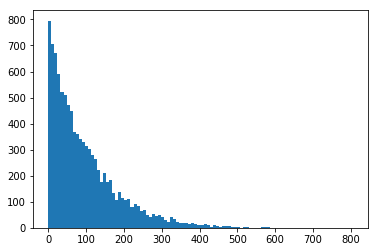

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(money_log, bins=100);